- eda 를 인사이트를 정보를 토대로 추가 및 제거를 통해 데이터 정리를 정돈 합니다.


In [1]:
import pandas as pd

eda_data = pd.read_csv('./data/final_0213.csv', encoding='utf-8')

eda_data.head()

,Unnamed: 0,출연자,제목,회차,조회수,좋아요수,댓글수,재생시간(초),구독자수,term,시청률,직업,성별,나이,수상여부,인지도,에피소드,날짜
0,0,나영석,[선공개] 유퀴즈에 포위된 나영석 PD! 형이 왜 거기서 나와..?,40,881349,6186,224,314,0,1290,2.6,서비스,M,중년,Y,Y,40,2019-10-22
1,1,이명진,드라마를 위해 조셉과 거래(?) 하는 이명진PD님 |,40,173,1,1,109,0,1290,2.6,서비스,M,청년,N,N,40,2019-10-22
2,2,김부연,[#유퀴즈] 41화 레전드! ′X줄(?) 타는 스카이워크′부터 ′돌아온 의자 브레이...,41,593,4,1,394,0,1290,2.7,기타,F,중년,N,N,41,2019-10-29
3,3,김유자,[#유퀴즈] 41화 레전드! ′X줄(?) 타는 스카이워크′부터 ′돌아온 의자 브레이...,41,593,4,1,394,0,1290,2.7,기타,F,청년,N,N,41,2019-10-29
4,4,김만순,[#유퀴즈] 41화 레전드! ′X줄(?) 타는 스카이워크′부터 ′돌아온 의자 브레이...,41,593,4,1,394,0,1290,2.7,기타,F,노년,N,N,41,2019-10-29


In [2]:
eda_data.columns

Index(['Unnamed: 0', '출연자', '제목', '회차', '조회수', '좋아요수', '댓글수', '재생시간(초)',
       '구독자수', 'term', '시청률', '직업', '성별', '나이', '수상여부', '인지도', '에피소드', '날짜'],
      dtype='object')

- 제거 컬럼 : Unnamed: 0 , 제목 , 조회수 , 좋아요수 ,댓글수,재생시간(초) , term,  에피소드(중복) 

In [3]:
df_data = eda_data.drop(columns=['Unnamed: 0' , '제목' , '조회수' , '좋아요수' ,'댓글수','재생시간(초)' , 'term',  '에피소드'])

In [8]:
df_data.head()

,출연자,회차,구독자수,시청률,직업,성별,나이,수상여부,인지도,날짜
0,나영석,40,0,2.6,서비스,M,중년,Y,Y,2019-10-22
1,이명진,40,0,2.6,서비스,M,청년,N,N,2019-10-22
2,김부연,41,0,2.7,기타,F,중년,N,N,2019-10-29
3,김유자,41,0,2.7,기타,F,청년,N,N,2019-10-29
4,김만순,41,0,2.7,기타,F,노년,N,N,2019-10-29



1. 날짜 컬럼을 변경
3. 구독자 수 컬럼 쉼표 제거


In [11]:
day_data = df_data  # 날짜 컬럼 변경

day_data['날짜'] = pd.to_datetime(day_data['날짜'])

day_data['년'] = day_data['날짜'].dt.year
day_data['월'] = day_data['날짜'].dt.month
day_data['일'] = day_data['날짜'].dt.day

day_data=day_data.drop(columns=['날짜'])
day_data.head()


,출연자,회차,구독자수,시청률,직업,성별,나이,수상여부,인지도,년,월,일
0,나영석,40,0,2.6,서비스,M,중년,Y,Y,2019,10,22
1,이명진,40,0,2.6,서비스,M,청년,N,N,2019,10,22
2,김부연,41,0,2.7,기타,F,중년,N,N,2019,10,29
3,김유자,41,0,2.7,기타,F,청년,N,N,2019,10,29
4,김만순,41,0,2.7,기타,F,노년,N,N,2019,10,29


In [13]:
gu_data = day_data

gu_data.tail()

,출연자,회차,구독자수,시청률,직업,성별,나이,수상여부,인지도,년,월,일
830,유연수,228,"894,000",4.912,운동선수,M,청년,Y,Y,2024,1,17
831,박인비,228,"894,000",4.912,운동선수,F,청년,Y,Y,2024,1,17
832,김영옥,229,"897,000",4.468,연예인,F,노년,Y,Y,2024,1,24
833,나문희,229,"897,000",4.468,연예인,F,노년,Y,Y,2024,1,24
834,신영철,229,"897,000",4.468,사회복지,M,노년,Y,N,2024,1,24


In [14]:
#쉼표 제거
gu_data['구독자수'] = pd.to_numeric(gu_data['구독자수'].str.replace('명', '').str.replace(',', ''), errors='coerce')


gu_data.tail()


,출연자,회차,구독자수,시청률,직업,성별,나이,수상여부,인지도,년,월,일
830,유연수,228,894000,4.912,운동선수,M,청년,Y,Y,2024,1,17
831,박인비,228,894000,4.912,운동선수,F,청년,Y,Y,2024,1,17
832,김영옥,229,897000,4.468,연예인,F,노년,Y,Y,2024,1,24
833,나문희,229,897000,4.468,연예인,F,노년,Y,Y,2024,1,24
834,신영철,229,897000,4.468,사회복지,M,노년,Y,N,2024,1,24


In [15]:
df = gu_data

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 835 entries, 0 to 834
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   출연자     835 non-null    object 
 1   회차      835 non-null    int64  
 2   구독자수    835 non-null    int64  
 3   시청률     835 non-null    float64
 4   직업      835 non-null    object 
 5   성별      835 non-null    object 
 6   나이      835 non-null    object 
 7   수상여부    835 non-null    object 
 8   인지도     835 non-null    object 
 9   년       835 non-null    int32  
 10  월       835 non-null    int32  
 11  일       835 non-null    int32  
dtypes: float64(1), int32(3), int64(2), object(6)
memory usage: 68.6+ KB


In [17]:
df.to_csv('final_0214.csv', encoding='utf-8') # 저장

**머신러닝**


In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder


# 2. 범주형 변수를 원-핫 인코딩으로 변환
# 원-핫 인코더 생성
ohe = OneHotEncoder(sparse=False, drop='first')

# 원-핫 인코딩 적용할 범주형 변수 선택
categorical_cols = ['출연자', '직업', '성별', '나이', '수상여부', '인지도']

# 원-핫 인코딩 적용
categorical_data_encoded = ohe.fit_transform(df[categorical_cols])

# 원-핫 인코딩된 데이터프레임 생성
categorical_data_df = pd.DataFrame(categorical_data_encoded, columns=ohe.get_feature_names_out(categorical_cols))

# 기존 데이터프레임에서 범주형 열 제거 후, 수치형 데이터와 원-핫 인코딩된 데이터 결합
data_numeric = df.drop(columns=categorical_cols)
data_preprocessed = pd.concat([data_numeric, categorical_data_df], axis=1)

# 3. 특성과 타겟 변수 분리
X = data_preprocessed.drop(columns=['시청률'])
y = data_preprocessed['시청률']

# 4. 학습 및 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape


/Users/2suyeon/anaconda3/envs/ML_project/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


((668, 817), (167, 817), (668,), (167,))

In [23]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# 랜덤 포레스트 회귀 모델 초기화
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# 모델 학습
rf_regressor.fit(X_train, y_train)

# 테스트 데이터에 대한 예측
y_pred = rf_regressor.predict(X_test)

# 성능 평가: RMSE(평균 제곱근 오차)와 R^2(결정 계수) 계산
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

rmse, r2


(0.3670343622847555, 0.8790373276697451)

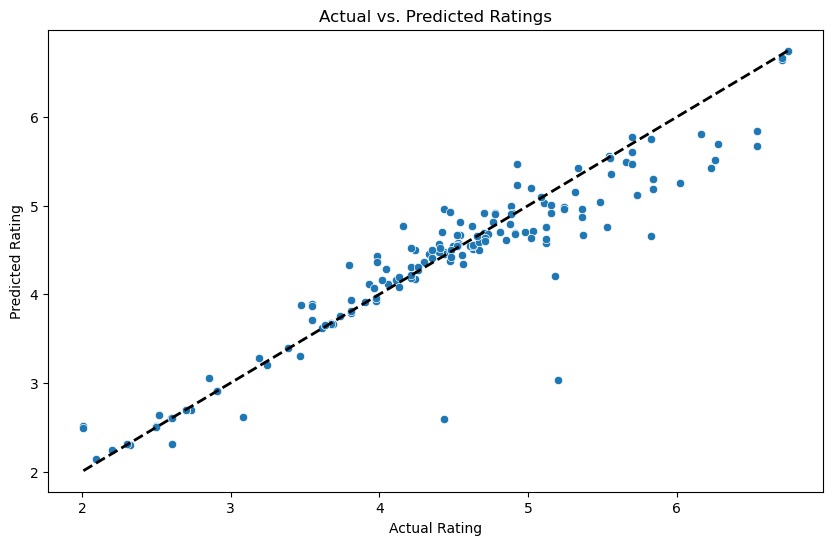

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# 실제 시청률 대 예측 시청률 산점도
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # 대각선 추가
plt.xlabel('Actual Rating')
plt.ylabel('Predicted Rating')
plt.title('Actual vs. Predicted Ratings')

plt.show()
# 상관이 아니다.

In [36]:
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb

rf_model = RandomForestRegressor(n_estimators=100)
gb_model= GradientBoostingRegressor(n_estimators=100)
xgb_model = xgb.XGBRFRegressor(objective='reg:squarederror', n_estimators=100, max_depth=5)

rf_model.fit(X_train, y_train)
gb_model.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)

# 각 모델로부터 예측
rf_predictions = rf_model.predict(X_test)
gb_predictions = gb_model.predict(X_test)
xgb_predictions = xgb_model.predict(X_test)



In [38]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Print predictions
print("Random Forest Predictions:", rf_predictions)
print("Gradient Boosting Predictions:", gb_predictions)
print("XGBoost Predictions:", xgb_predictions)

# Evaluate each model
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_mae = mean_absolute_error(y_test, rf_predictions)
rf_r2 = r2_score(y_test, rf_predictions)

gb_mse = mean_squared_error(y_test, gb_predictions)
gb_mae = mean_absolute_error(y_test, gb_predictions)
gb_r2 = r2_score(y_test, gb_predictions)

xgb_mse = mean_squared_error(y_test, xgb_predictions)
xgb_mae = mean_absolute_error(y_test, xgb_predictions)
xgb_r2 = r2_score(y_test, xgb_predictions)

# Print evaluation metrics
print("\nRandom Forest - MSE:", rf_mse, "MAE:", rf_mae, "R2:", rf_r2)
print("Gradient Boosting - MSE:", gb_mse, "MAE:", gb_mae, "R2:", gb_r2)
print("XGBoost - MSE:", xgb_mse, "MAE:", xgb_mae, "R2:", xgb_r2)


Random Forest Predictions: [5.74748    5.46778    4.36053    4.4964525  3.75422    4.47392
 5.20678    2.72214    4.79487    4.61951    5.41059333 3.67979
 4.69774    4.38652    2.60447    4.6877     4.49329    4.79487
 3.98834    4.15217    5.2902     2.60793    4.7435     4.747
 4.43338    4.59777    3.60800667 3.70511    4.1333     4.43152
 5.2161     4.92427    3.6726     4.11369    2.2157     4.65562
 4.70411    4.27349    2.13861    2.49772    4.46485    5.80282
 2.50901    4.91817    4.84618    2.49096    5.90175    5.79522
 3.76396    4.6812     4.24849    5.44779    4.53757    4.65442
 4.2264     3.92626    4.64282    4.82217    4.69459    4.46278
 4.648265   4.56521    4.65562    2.5048     4.52604    4.50283
 5.02072    4.377495   3.98182    4.87614    4.0292     2.53082
 6.70453    4.35324    2.64307    4.1690475  4.71232    4.63477
 2.606      2.60464    5.40918    4.20201    5.16211    4.33583
 4.53621    5.47247    4.60246    3.01616    3.03646    2.91584
 4.25081    4.6

- mse 와 mae 값이 낮은 모델이 좋음 r2 1에 가까워야 좋음 
#5프로의 오차를 갖는다

In [39]:
# R² 점수 계산
rf_r2 = r2_score(y_test, rf_predictions)
gb_r2 = r2_score(y_test, gb_predictions)
xgb_r2 = r2_score(y_test, xgb_predictions)

# R² 점수의 평균 계산
r2_average = (rf_r2 + gb_r2 + xgb_r2) / 3

# 결과 출력
print("랜덤 포레스트 R² 점수:", rf_r2)
print("그래디언트 부스팅 R² 점수:", gb_r2)
print("XGBoost R² 점수:", xgb_r2)
print("R² 점수 평균:", r2_average)


랜덤 포레스트 R² 점수: 0.880047993791069
그래디언트 부스팅 R² 점수: 0.782744911157632
XGBoost R² 점수: 0.7486406193373802
R² 점수 평균: 0.803811174762027
